# Eddy Kinetic Energy decomposition into mesoscale and large scale

This Jupyter notebook reproduces the Extended Data Figure 5 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". 

In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from plot_utils import area, compute_trends, ccrs_land,add_patches

### Import timeseries

In [3]:
eke_decomposition = xr.open_dataset('../../datasets/EKE_decomposition_timeseries.nc')

### Import trends

In [4]:
eke_m_trend=xr.open_dataset('../../datasets/mesoscale_EKE_trends.nc')
eke_ls_trends = xr.open_dataset('../../datasets/largescale_EKE_trends.nc')

In [5]:
area_grid = area(eke_decomposition.lat,eke_decomposition.lon)

In [6]:
mesoscale_eke = (eke_decomposition.EKE_m * area_grid).sum(('lon','lat'))

In [7]:
largescale_eke = (eke_decomposition.EKE_ls * area_grid).sum(('lon','lat'))

In [8]:
mesoscale_eke = mesoscale_eke.where(mesoscale_eke!=0).dropna('time')

In [9]:
largescale_eke = largescale_eke.where(largescale_eke!=0).dropna('time')

## Plot

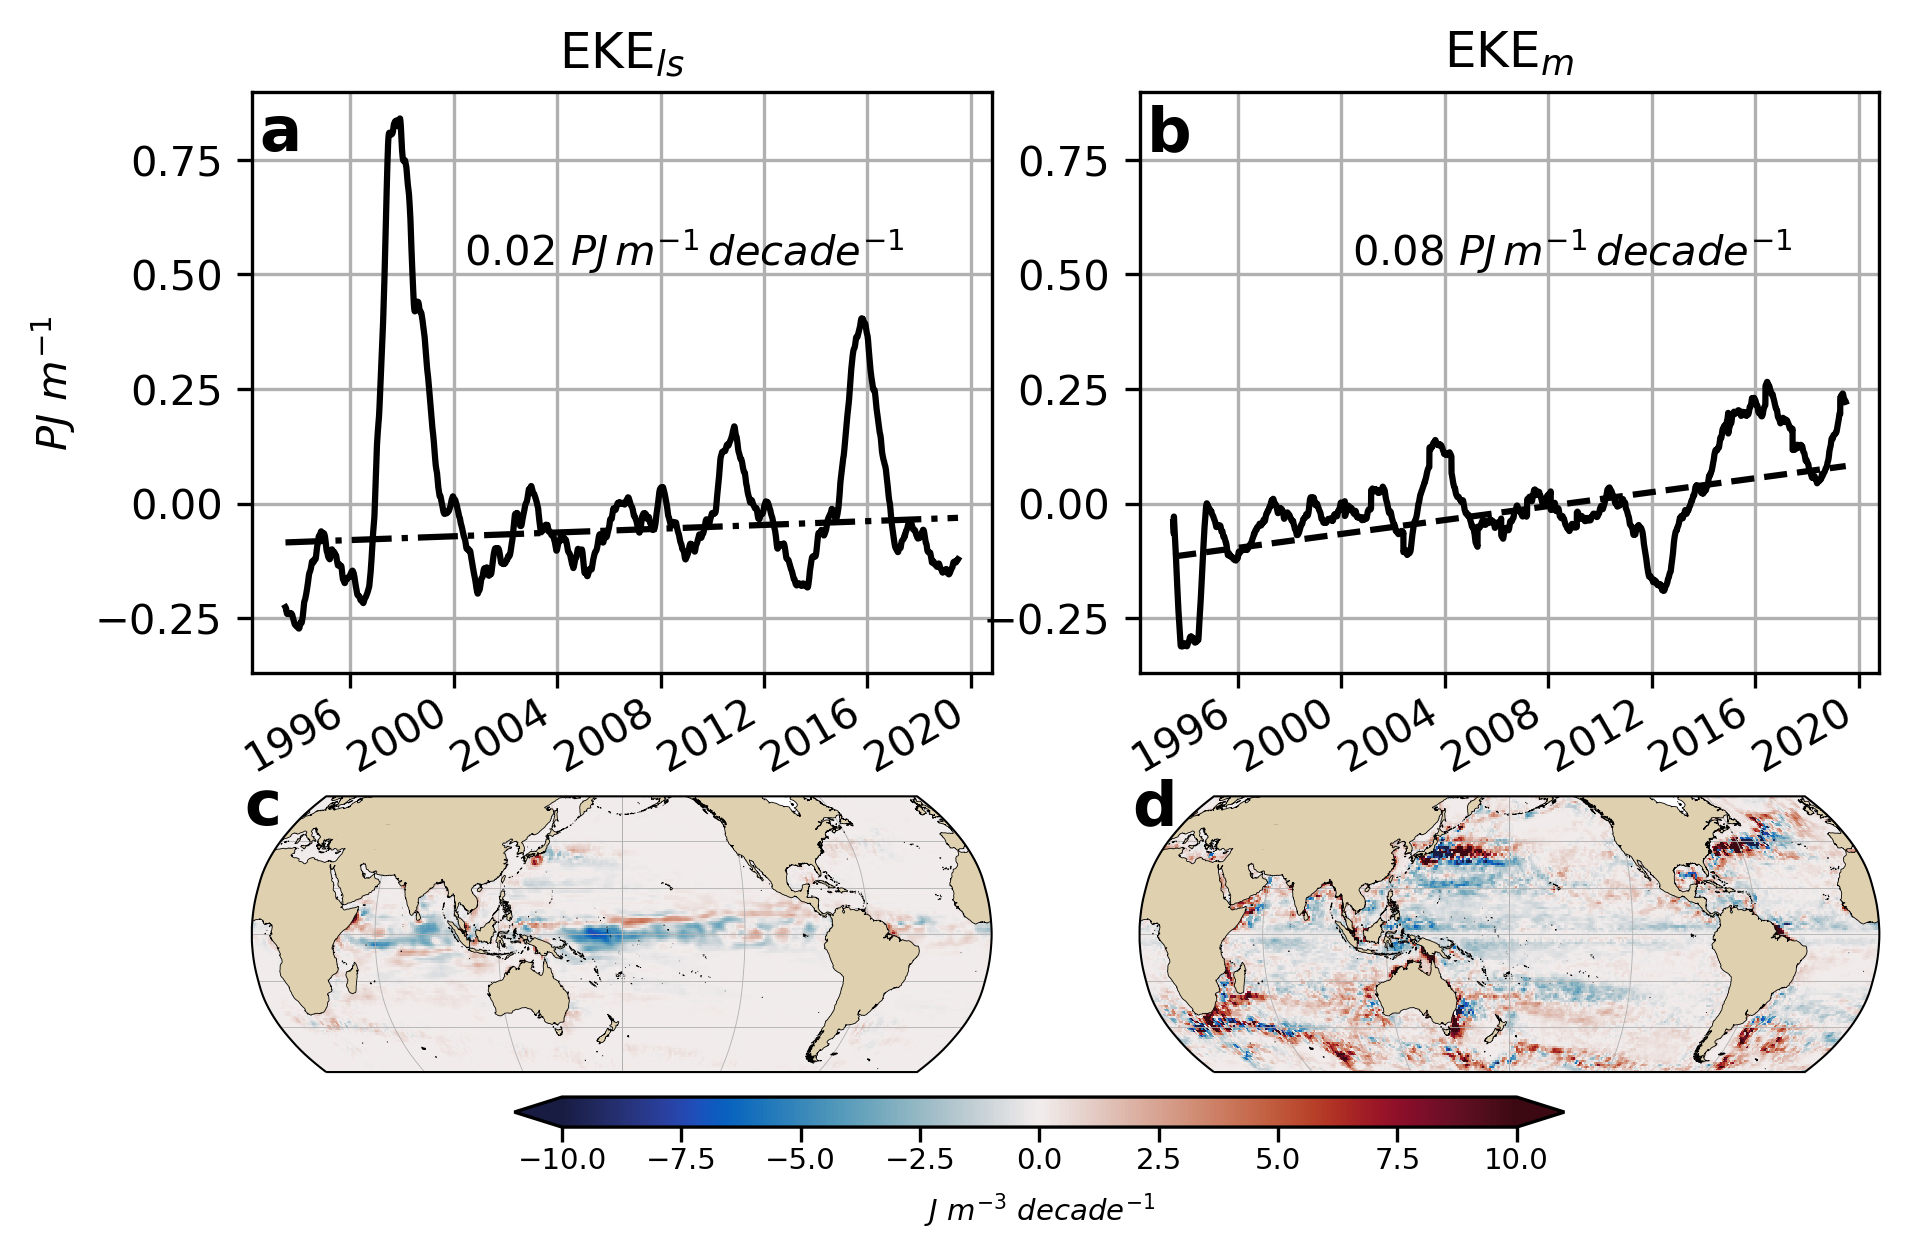

In [11]:
plt.rcParams['xtick.major.pad']='1'


fig = plt.figure(figsize=(7, 5),dpi=300)

ax1=fig.add_subplot(2, 2, 1)

anomaly1=(largescale_eke-largescale_eke.mean())/1e15
anomaly1.plot(ax=ax1,color='k')

slope1, intercept1 = compute_trends(anomaly1)
ax1.plot(anomaly1.time, slope1*range(len(anomaly1))+intercept1,'-.k')
ax1.grid()
ax1.text('2000-06-01', 0.52, str(np.round(slope1*365*10,2))+" $ PJ\, m^{-1}\, decade^{-1}$")

ax1.set_ylabel(r"$PJ\ m^{-1}$")
ax1.set_title(r'$\mathrm{EKE}_{ls}$')

##################################################################################################
## Subplot##
##################################################################################################

ax2=fig.add_subplot(2, 2, 2,sharey=ax1)

anomaly2=(mesoscale_eke-mesoscale_eke.mean()).dropna('time')/1e15
anomaly2.plot(ax=ax2,color='k')

slope2, intercept2 = compute_trends(anomaly2)
ax2.plot(anomaly2.time, slope2*range(len(anomaly2))+intercept2,'--k')
ax2.grid()
ax2.text('2000-06-01', 0.52, str(np.round(slope2*365*10,2))+" $ PJ\, m^{-1}\, decade^{-1} $")

ax2.set_title(r'$\mathrm{EKE}_m$')

##################################################################################################
## Subplot##
##################################################################################################
EKE_ls_trends=eke_ls_trends.trend*10*365

ax3=fig.add_subplot(2, 2, 3,projection= ccrs.Robinson(central_longitude=180))
clm3=EKE_ls_trends.plot(vmin=-10,vmax=10,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,rasterized=True,add_colorbar=False)

ax3.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax3.add_feature(ccrs_land, zorder=2)
ax3.spines['geo'].set_linewidth(0.5)
add_patches(ax3)

gl=ax3.gridlines(linewidth=0.2)


##################################################################################################
## Subplot##
##################################################################################################
EKE_m_trend=eke_m_trend.trend*10*365

ax4=fig.add_subplot(2, 2, 4,projection= ccrs.Robinson(central_longitude=180))
clm4=EKE_m_trend.plot(vmin=-10,vmax=10,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,rasterized=True,add_colorbar=False)

ax4.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax4.add_feature(ccrs_land, zorder=2)
ax4.spines['geo'].set_linewidth(0.5)
add_patches(ax4)

gl=ax4.gridlines(linewidth=0.2)

############################################################################################################
############################################################################################################
############################################################################################################

cbar_ax = fig.add_axes([0.25, 0.19, 0.5, 0.02])
cbar=fig.colorbar(clm3, cax=cbar_ax,orientation='horizontal',extend='both')
cbar.set_label('$J\ m^{-3}\ decade^{-1} $', rotation=0, fontsize=7)
cbar.ax.tick_params(labelsize=7)

plt.subplots_adjust(hspace=-0.05)

ax1.text(0.01,0.9,'a',fontweight='bold',fontsize=15,transform=ax1.transAxes)
ax2.text(0.01,0.9,'b',fontweight='bold',fontsize=15,transform=ax2.transAxes)
ax3.text(-0.01,0.9,'c',fontweight='bold',fontsize=15,transform=ax3.transAxes)
ax4.text(-0.01,0.9,'d',fontweight='bold',fontsize=15,transform=ax4.transAxes)

plt.savefig('../../LaTeX/figures/large_scale_vs_small_scalle_eke.pdf',dpi=300,bbox_inches='tight')

**Extended Data Figure 5 | Surface eddy kinetic energy time-series and trends computed from filtered velocities.** Scales larger than typical mesoscale are computed by filtering the surface velocity fields with a $3^\circ$ kernel filter ($u_{ls}$), and the smaller scales are calculated from the difference of the velocity fields and the filtered velocity field ($u_e=u−u_{ls}$).


In [12]:
percentage_v_integrated = (slope2*365*27*1e15*500 / 13e18) * 100
print("The observed EKE trends integrated over 500 m imply a significant increase is {0} ".format(np.round(percentage_v_integrated,2)))

The observed EKE trends integrated over 500 m imply a significant increase is 0.79 


In [13]:
print(r"Equivalent to {0} $\times10^17$ J".format(np.round((slope2*365*27*1e15*500)/1e17,2)))

Equivalent to 1.03 $\times10^17$ J
